In [1]:
# Importing all Dependencies
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
import time

#print("Current date "  + time.strftime("%x"))
cur_date = time.strftime("%x")


In [2]:
# Read original data file as CSV and converting to data frame
plane_data = pd.read_csv("data/Airplane_Crashes_and_Fatalities_Since_1908.csv")
plane_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0,Hydrogen gas which was being vented was sucked...


In [3]:
# Convert date from string to date times
# plane_data['Date'] = plane_data['Date'].apply(dateutil.parser.parse, dayfirst=True)
# plane_data.dtypes

plane_data["Date"]=plane_data["Date"].astype("datetime64[ns]")
plane_data.dtypes



Date            datetime64[ns]
Time                    object
Location                object
Operator                object
Flight #                object
Route                   object
Type                    object
Registration            object
cn/In                   object
Aboard                 float64
Fatalities             float64
Ground                  object
Summary                 object
dtype: object

In [4]:
# #get year and create a new column - Year

# plane_data['Year'] = pd.DatetimeIndex(plane_data['Date']).year
# plane_data.head()

plane_data['Year'] = plane_data['Date'].map(lambda x: x.year)
plane_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0,"During a demonstration flight, a U.S. Army fly...",1908
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0,First U.S. dirigible Akron exploded just offsh...,1912
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0,The first fatal airplane accident in Canada oc...,1913
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0,The airship flew into a thunderstorm and encou...,1913
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0,Hydrogen gas which was being vented was sucked...,1913


In [5]:
# Cleaning up the Type Columns

# plane_data.loc[index,"Make_Type"] = str(row["Type"])[:(str(row["Type"]).find(" "))]
# plane_data

word1 = "Military"
word2 = "Cargo"
word3 = "Mail"
word4 = "Passenger"
word5 = "Private"


for index,row in plane_data.iterrows():
    type_plane=str(row["Type"])
    make_type=type_plane[:type_plane.find(" ")]
    plane_data.loc[index,"Make_Type"]=make_type
    
    operator = row["Operator"]
    
    try:
        if word1 in operator:
            Op_Code = word1
        elif word2 in operator:
            Op_Code = word2
        elif word3 in operator:
            Op_Code = word3
        elif word5 in operator:
            Op_Code = word5
        else:
            Op_Code = word4
    except:
        Op_Code = "Unknown"
    plane_data.loc[index,"Op_Code"] = Op_Code
plane_data.head(50)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Make_Type,Op_Code
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0,"During a demonstration flight, a U.S. Army fly...",1908,Wright,Military
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0,First U.S. dirigible Akron exploded just offsh...,1912,Dirigibl,Military
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0,The first fatal airplane accident in Canada oc...,1913,Curtiss,Private
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0,The airship flew into a thunderstorm and encou...,1913,Zeppelin,Military
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0,Hydrogen gas which was being vented was sucked...,1913,Zeppelin,Military
5,1915-03-05,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0,Crashed into trees while attempting to land af...,1915,Zeppelin,Military
6,1915-09-03,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0,"Exploded and burned near Neuwerk Island, when...",1915,Zeppelin,Military
7,1916-07-28,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0,"Crashed near the Black Sea, cause unknown.",1916,Schutte-Lanz,Military
8,1916-09-24,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0,Shot down by British aircraft crashing in flames.,1916,Zeppelin,Military
9,1916-10-01,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0,Shot down in flames by the British 39th Home D...,1916,Zeppelin,Military


In [6]:
#Create bins for decades
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
group_names = ["1900-1910", "1911-1920", "1921-1930", "1931-1940", "1941-1950",
              "1951-1960", "1961-1970", "1971-1980", "1981-1990", "1991-2000", "2001-2010"]

plane_data["Decade"] = pd.cut(plane_data["Year"], bins, labels=group_names)
plane_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Make_Type,Op_Code,Decade
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0,"During a demonstration flight, a U.S. Army fly...",1908,Wright,Military,1900-1910
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0,First U.S. dirigible Akron exploded just offsh...,1912,Dirigibl,Military,1911-1920
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0,The first fatal airplane accident in Canada oc...,1913,Curtiss,Private,1911-1920
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0,The airship flew into a thunderstorm and encou...,1913,Zeppelin,Military,1911-1920
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0,Hydrogen gas which was being vented was sucked...,1913,Zeppelin,Military,1911-1920


In [7]:
#dropping unwanted columns:

plane_data = plane_data.drop(['Registration', 'cn/In','Ground','Flight #','Time',"Route"], axis=1)
plane_data.head()

,Date,Location,Operator,Type,Aboard,Fatalities,Summary,Year,Make_Type,Op_Code,Decade
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,"During a demonstration flight, a U.S. Army fly...",1908,Wright,Military,1900-1910
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,First U.S. dirigible Akron exploded just offsh...,1912,Dirigibl,Military,1911-1920
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,The first fatal airplane accident in Canada oc...,1913,Curtiss,Private,1911-1920
3,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,The airship flew into a thunderstorm and encou...,1913,Zeppelin,Military,1911-1920
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,Hydrogen gas which was being vented was sucked...,1913,Zeppelin,Military,1911-1920


In [8]:
#rearrange the Year column 
plane_data = plane_data[["Decade","Year","Date","Location",
                         "Operator", "Op_Code",
                         "Type","Make_Type","Aboard","Fatalities",
                        "Summary"]]
plane_data.head()

,Decade,Year,Date,Location,Operator,Op_Code,Type,Make_Type,Aboard,Fatalities,Summary
0,1900-1910,1908,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Military,Wright Flyer III,Wright,2.0,1.0,"During a demonstration flight, a U.S. Army fly..."
1,1911-1920,1912,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Military,Dirigible,Dirigibl,5.0,5.0,First U.S. dirigible Akron exploded just offsh...
2,1911-1920,1913,1913-08-06,"Victoria, British Columbia, Canada",Private,Private,Curtiss seaplane,Curtiss,1.0,1.0,The first fatal airplane accident in Canada oc...
3,1911-1920,1913,1913-09-09,Over the North Sea,Military - German Navy,Military,Zeppelin L-1 (airship),Zeppelin,20.0,14.0,The airship flew into a thunderstorm and encou...
4,1911-1920,1913,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Military,Zeppelin L-2 (airship),Zeppelin,30.0,30.0,Hydrogen gas which was being vented was sucked...


In [9]:
output_data_file1 = "data/planecrash_cleaned_data.csv"

#Export the city data into a .csv without index column
plane_data.to_csv(output_data_file1, index = False)

In [10]:
oper_data = pd.read_csv(output_data_file1)
oper_data.head()

,Decade,Year,Date,Location,Operator,Op_Code,Type,Make_Type,Aboard,Fatalities,Summary
0,1900-1910,1908,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Military,Wright Flyer III,Wright,2.0,1.0,"During a demonstration flight, a U.S. Army fly..."
1,1911-1920,1912,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Military,Dirigible,Dirigibl,5.0,5.0,First U.S. dirigible Akron exploded just offsh...
2,1911-1920,1913,1913-08-06,"Victoria, British Columbia, Canada",Private,Private,Curtiss seaplane,Curtiss,1.0,1.0,The first fatal airplane accident in Canada oc...
3,1911-1920,1913,1913-09-09,Over the North Sea,Military - German Navy,Military,Zeppelin L-1 (airship),Zeppelin,20.0,14.0,The airship flew into a thunderstorm and encou...
4,1911-1920,1913,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Military,Zeppelin L-2 (airship),Zeppelin,30.0,30.0,Hydrogen gas which was being vented was sucked...


In [11]:
var_aboard=oper_data["Aboard"]
# var_f=oper_data["Fatalities"]
var_yr=oper_data.groupby("Year", as_index=False)["Aboard","Fatalities"].sum()

<IPython.core.display.Javascript object>


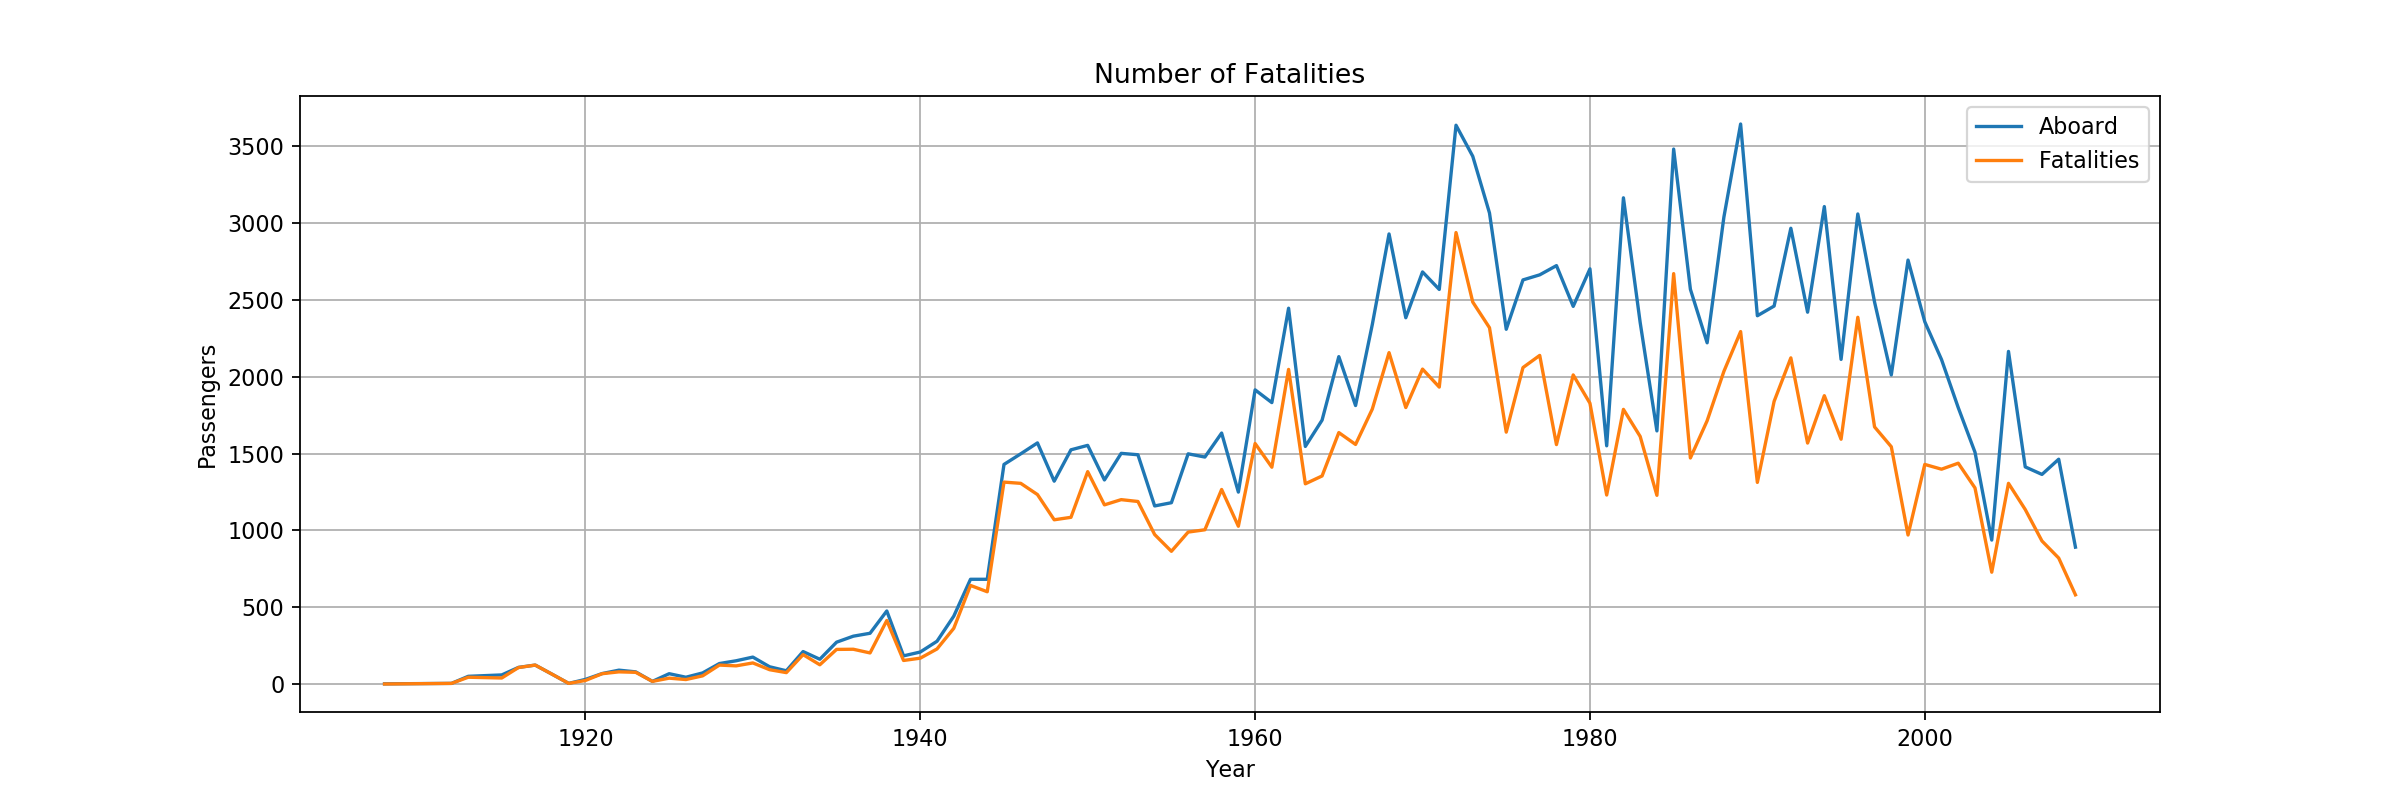

In [12]:
plt.figure(figsize=(15,5))

plt.plot(var_yr["Year"],var_yr["Aboard"])
plt.plot(var_yr["Year"],var_yr["Fatalities"])

plt.grid()
plt.title("Number of Fatalities")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend(loc="best")
plt.savefig("Data/aboardvsfatalities_by_yr")
plt.show()

In [13]:
var_decade=oper_data["Decade"]
var_fatalities=oper_data["Fatalities"]

var_decade.value_counts()

1971-1980    815
1991-2000    779
1961-1970    746
1981-1990    724
1951-1960    595
1941-1950    555
2001-2010    507
1931-1940    317
1921-1930    185
1911-1920     44
1900-1910      1
Name: Decade, dtype: int64

<IPython.core.display.Javascript object>


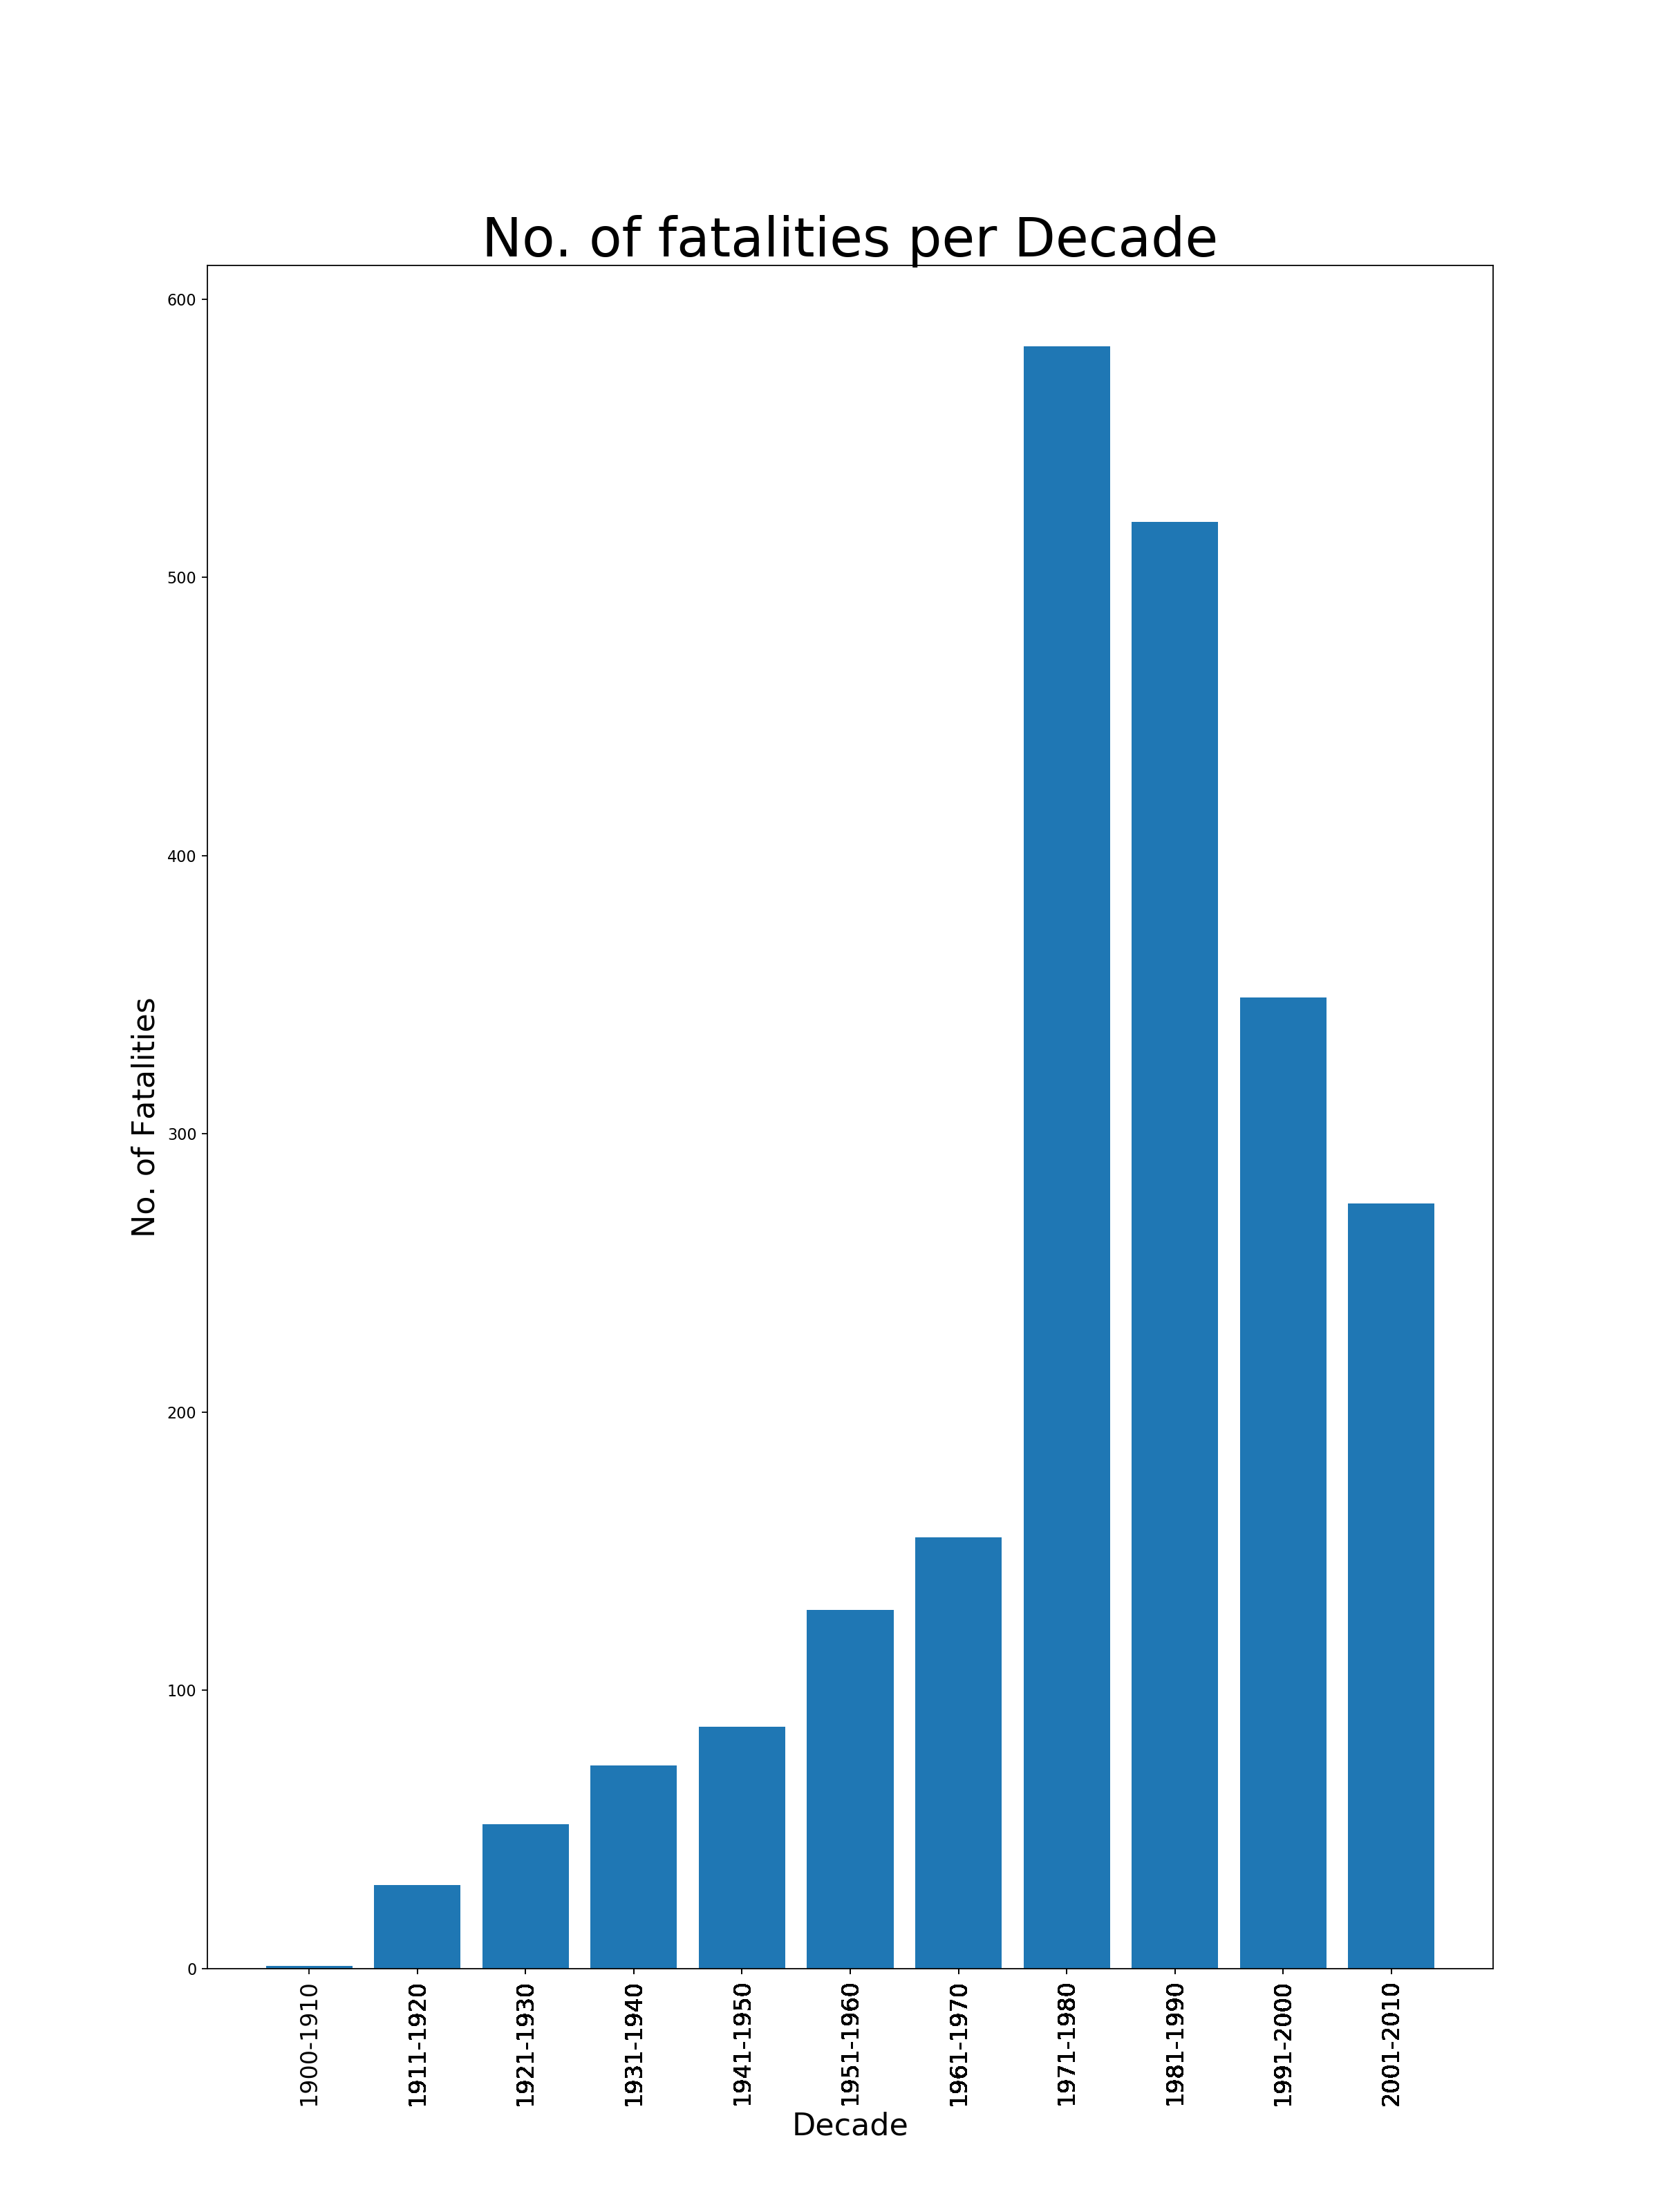

<BarContainer object of 5268 artists>

In [18]:
plt.figure(figsize=(15,20))
plt.bar(var_decade,var_fatalities,)

In [21]:
plt.xticks(var_decade, rotation=90,fontsize=15)
plt.title("No. of fatalities per Decade",fontsize=35)
plt.ylabel("No. of Fatalities",fontsize=20)
plt.xlabel("Decade",fontsize=20)
plt.savefig('data/fatalities_per_decade.png')
